In [12]:
import numpy as np
import pandas as pd

#Bibloteki do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns

# Bibloteka scikit-learn
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

In [7]:
def get_X():
    tablica = np.random.rand(100, 1)
    
    return 6 * tablica - 3


def get_y(X):
    tablica = np.random.randn(100, 1)
    
    return 0.5 * X ** 2 + X + 2 + tablica

In [8]:
X = get_X()
X = np.array(sorted(X))
y = get_y(X)

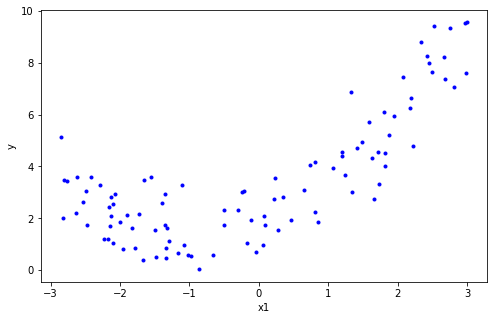

In [9]:
plt.figure(figsize=(8, 5))
plt.xlabel('x1')
plt.ylabel('y')
plt.plot(X, y, 'b.')
plt.show()

In [13]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [39]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005, verbose=0)

In [ ]:
minimalny_blad_valid = float('inf')
najlepsza_epoka = None
najlepsza_model = None

for epoka in range(1000):
    sgd_reg.fit(X_train, y_train.ravel())
    y_pred = sgd_reg.predict(X_test)
    test_error = mse(y_test, y_pred)
    if test_error < minimalny_blad_valid:
        minimalny_blad_valid = test_error
        najlepsza_epoka = epoka
        najlepsza_model = clone(sgd_reg)

In [42]:
minimalny_blad_valid

1.5234073941735704